# Задача 14

## Пусть ${x_n}$ и ${y_m}$ - независимые случайные выборки из нормального распределения с параматрами a, ${\sigma_x ^2 = 2}$ и b, ${\sigma_y ^2 = 1}$ соответственно. Используя реализации случайных выборок: x = {-1.11, -6.10, 2.42}, y = {-2.29, -2.91}, проверить гипотезу о равенстве средних против альтернатив a > b. Построить график мощности критерия.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from rich.console import Console
from rich.panel import Panel
from rich.text import Text

console = Console()

n = 1000

alpha = 0.05
betta = 0.95

x_sampling = np.array([-1.11, -6.10, 2.42])
y_sampling = np.array([-2.29, -2.91])

sigma_sqr_x = 2
sigma_sqr_y = 1

h_wave = np.mean(x_sampling) - np.mean(y_sampling)

bootstrap_delta = []

for _ in range(n):
    x_subsample = np.random.choice(x_sampling, size=len(x_sampling))
    y_subsample = np.random.choice(y_sampling, size=len(y_sampling))
    h_star = np.mean(x_subsample) - np.mean(y_subsample)
    bootstrap_delta.append(h_star - h_wave)

variation_row = sorted(bootstrap_delta)

delta = variation_row[int(alpha * n)]

upper_grade = h_wave - delta

console.print(f"Доверительный интервал: (-∞, {upper_grade})")
console.print(f"Значение: {h_wave}")

Доверительный интервал: (-∞, 4.153333333333333)

Значение: 1.0033333333333334

### Так как 1.003 ∈ (-∞, 3.843), то у нас нет оснований отвергнуть гипотезу ${H_0}$.

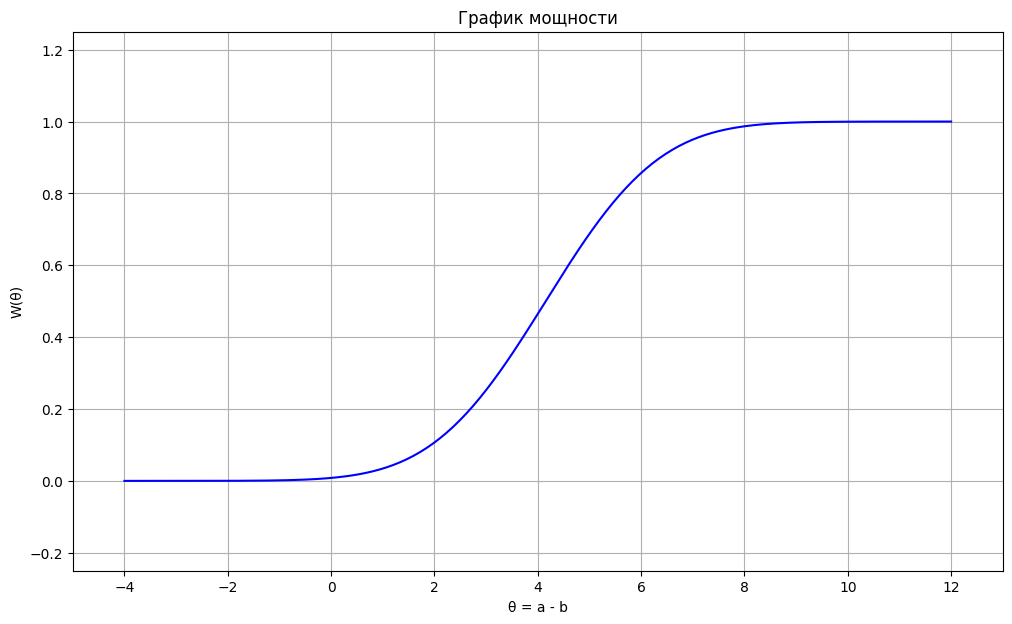

In [67]:
s = np.sqrt(sigma_sqr_x + sigma_sqr_y)

theta_values = np.linspace(-4, 12, 250)

W = 1 - norm.cdf(upper_grade, loc=theta_values, scale=s)

plt.figure(figsize=(12, 7))
plt.plot(theta_values, W, color='blue')
plt.xlabel("θ = a - b")
plt.ylabel("W(θ)")
plt.title("График мощности")
plt.grid(True)
plt.xlim(-5, 13)
plt.ylim(-0.25, 1.25)
plt.show()